In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import sympy as sp

In this project, I will be solving a second-order linear ordinary differential equation using numerical method (with the help of Taylor series expansion).

The following general form will be used:

$$\frac{d^2 y}{dx^2} + P(x) \frac{dy}{dx} + Q(x) y = f(x) \tag{1}$$

With the boundary conditions $y(a) = \alpha$ and $y(b) = \beta$

Let's denote

$$\delta x = \frac{b - a}{n}$$

Where n is the number of partitions between $a$ and $b$.

Moreover, for convinience, let

$$ y_i = y(x_i) , P_i = P(x_i) , Q_1 = Q(x_i) , f_i = f(x_i) $$

The numerical teachnique involves the following steps:
1. Select the appropriate number of steps (n).
2. Numerically approximate the derivatives in the ODE using Taylor series expansion (central difference).
3. Convert the equations that you obtained from step 2 into a matrix inversion problem that takes the form Ax = b.
4. Solve for the vector x.

#### Numerical Approximation of The ODE

Taylor series expansion can be used to make a numerical approximation of equation 1.

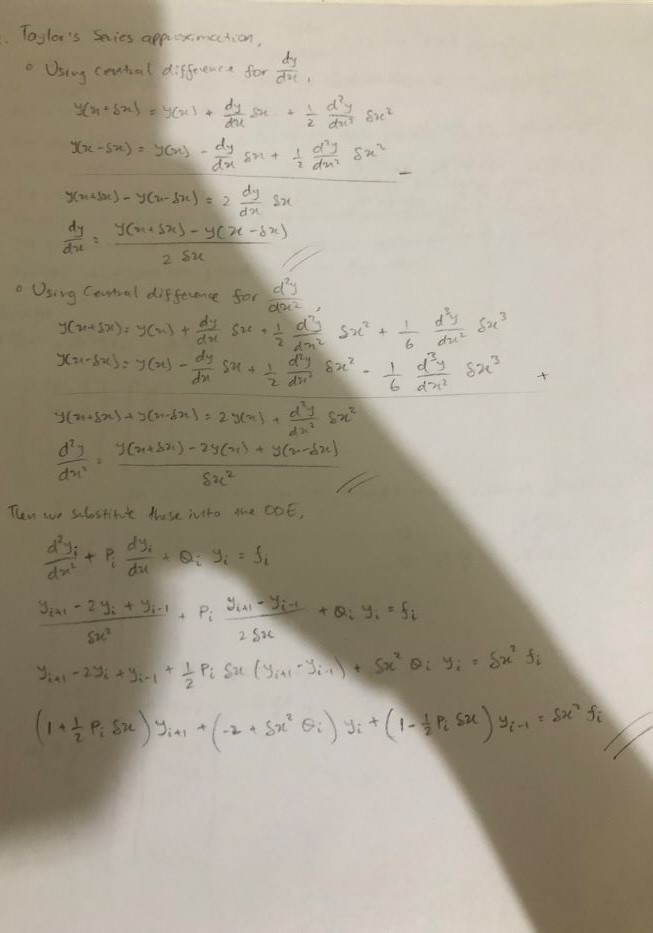

Let's the equation above as equation 2, where $i = 1, ... , n-1$

#### The Matrix Representation
The matrix representation of equation 2 is in the form of Ax = b,

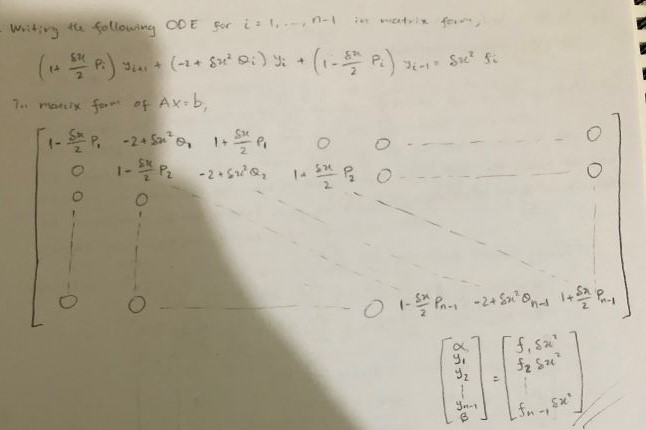

The matrix equation above can also be written as,

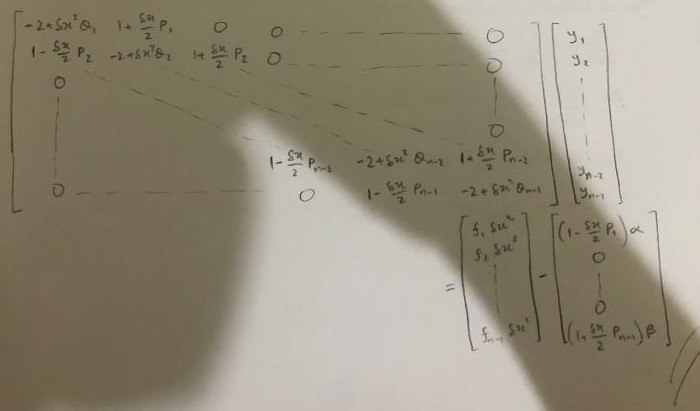

#### Defining a function to numerically solve the ODE

Note that in the function below, LU (Lower-Upper) decomposition is used to solve the matrix equation above.

In [2]:
def numerical_ode(a,b,n,lower_bound,upper_bound):
    '''
    a -> the lower bound for value of x
    b -> the upper bound for value of x
    n -> number of steps
    lower_bound -> the lower bound for value of y
    upper-boundary -> the upper bound for value of y
    '''
    # step size
    dx = (b-a)/n

    # range of values of x (excluding x at the boundaries)
    x = np.zeros(n-1)
    for step in range(1,n):
        x[step-1] = a + step*dx

    # sup-diagonal of matrix A
    P = 3
    sup_A = 1 + dx/2 * P

    # diagonal of matrix A
    Q = 2
    diag_A = -2 + Q*dx**2

    # sub-diagonal of matrix A
    sub_A = 1 - dx/2 * P

    # vector b
    f_vec = (4 * x**2)

    boundary_vec = np.zeros(n-1)
    boundary_vec[0] = (1 - dx/2 * P) * lower_bound
    boundary_vec[-1] = (1 + dx/2 * P) * upper_bound

    b_vec = f_vec* dx**2 - boundary_vec

    # Perform LU decomposition of matrix A
    u = np.zeros(n-2)
    d = np.zeros(n-1)
    l = np.zeros(n-2)

    d[0] = diag_A
    for i in range(n-2):
        u[i] = sup_A
        l[i] = sub_A/d[i]
        d[i+1] = diag_A - l[i] * u[i]
        
    # Solve the matrix equation Ax = b
        # Solve Lw = b
    w_vec = np.zeros(n-1)
    w_vec[0] = b_vec[0]/1
    for i in range(1,n-1):
        w_vec[i] = b_vec[i] - l[i-1] * w_vec[i-1]

        # Solve Ux = w
    solution = np.zeros(n-1)
    solution[-1] = w_vec[-1]/d[-1]
    for i in np.arange(-2,-(n-1)-1,-1):
        solution[i] = (w_vec[i] - u[i+1] * solution[i+1])/d[i]
        
    # range of values of x (including x at the boundaries)
    complete_xrange = np.append(x, 2)
    complete_xrange = np.insert(complete_xrange, 0, 1)

    # range of values of the solution y (including y at the boundaries)
    complete_yrange = np.append(solution, 6)
    complete_yrange = np.insert(complete_yrange, 0, 1)

    # Present the solution
    df_solution = pd.DataFrame({"x_i":complete_xrange, "y_i":complete_yrange})
    
    return df_solution

## Example Equation
The following equation is going to be used to compare the performace of the numerical solution against the exact solution.

$$\frac{d^{2}y}{dx^{2}}+3\frac{dy}{dx}+2y=4x^{2}$$

With the boundary conditions $y(1)=1$ and $y(2)=6$

#### With n=10

In [3]:
n_10 = numerical_ode(a=1,b=2,n=10,lower_bound=1,upper_bound=6)
n_10

,x_i,y_i
0,1.0,1.000000
1,1.1,2.404697
2,1.2,3.443218
3,1.3,4.201025
4,1.4,4.746864
5,1.5,5.135930
6,1.6,5.412442
7,1.7,5.611733
8,1.8,5.761962
9,1.9,5.885489


#### With n=50

In [4]:
n_50 = numerical_ode(a=1,b=2,n=50,lower_bound=1,upper_bound=6)
n_50

,x_i,y_i
0,1.00,1.000000
1,1.02,1.312317
2,1.04,1.607037
3,1.06,1.885021
4,1.08,2.147093
5,1.10,2.394043
6,1.12,2.626627
7,1.14,2.845572
8,1.16,3.051571
9,1.18,3.245290


#### With n=100

In [5]:
pd.set_option('display.max_rows', None)
n_100 = numerical_ode(a=1,b=2,n=100,lower_bound=1,upper_bound=6)
n_100

,x_i,y_i
0,1.00,1.000000
1,1.01,1.158371
2,1.02,1.312234
3,1.03,1.461701
4,1.04,1.606881
5,1.05,1.747879
6,1.06,1.884800
7,1.07,2.017745
8,1.08,2.146815
9,1.09,2.272106


#### The exact solution
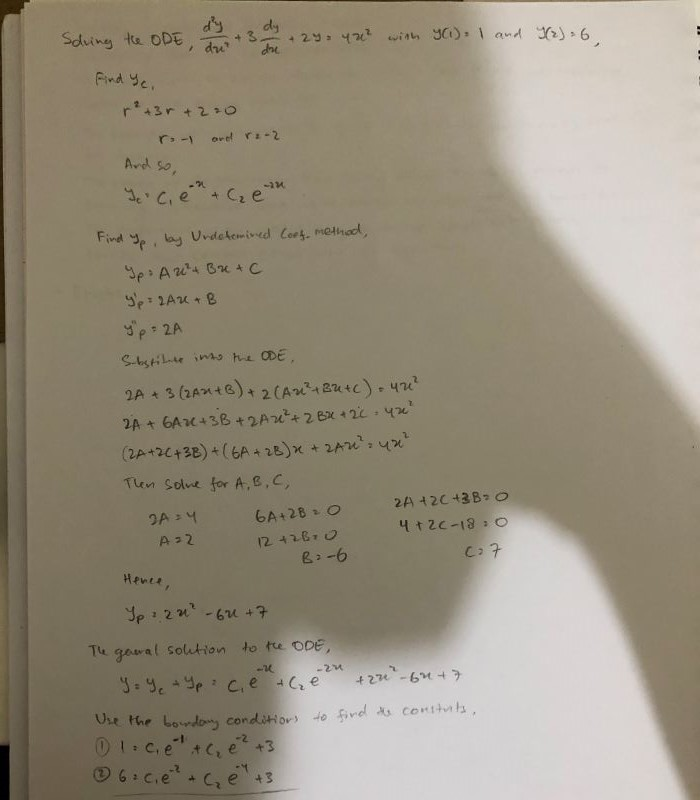

We get $c_1 = 38.23189732$ and $c_2 = -118.7031839$.

So the final solution is

$$ y = 38.23189732 e^{-i} - 118.7031839 e^{-2*i} + 2i^2 - 6i + 7 $$

In [16]:
def analytical_ode(a,b,n):
    dx = (b-a)/n
    
    df_solution = pd.DataFrame({"x_i":np.arange(a,b+dx,dx)})
    index = 0
    for i in np.arange(a,b+dx,dx):
        y = 38.23189732*np.e**(-i) - 118.7031839*np.e**(-2*i) + 2*i**2 - 6*i + 7
        df_solution.loc[index,"y_i exact"] = y
        index = index + 1
        
    return df_solution

#### Comparing the results for when n=10, n=50, and n=100
The Mean Squared Error (MSE) is going to be calculated for when n=10,50,100 to compared the deviation from the exact solution.

In [47]:
def mse_err(n, num_ode):
    '''
    n -> number of partitions
    num_ode -> table of the ODE solved numerically with n partitions
    '''
    exact = analytical_ode(a=1,b=2,n=n)
    comb = pd.concat([num_ode, exact["y_i exact"]], axis=1)
    mse = ((comb['y_i'] - comb['y_i exact'])**2).sum() / (comb.shape[0] - 2) # the -2 is to exclude the boundary conditions
    return mse

In [53]:
# mse for n=10
mse_err(10, n_10)

0.00016890058273014228

In [54]:
# mse for n=50
mse_err(50, n_50)

2.42300019942978e-07

In [55]:
# mse for n=100
mse_err(100, n_100)

1.497879950967425e-08

As the number partitions n gets larger, we observe that the MSE becomes smaller, i.e. the accuracy of the numerical solution increases as we increase the value of n.